# Week 7: Convolutional Neural Networks (CNN)

In this lab, we will cover the convolutional and pooling layers to create CNNs. <br>
We also build a model to classify digit images using the MNIST dataset.

## Basic Imports

For this lab session, we will use Numpy and PyTorch.<br>
Please visit the [PyTorch Tutorial](https://pytorch.org/tutorials/) page if you want to learn it systematically.<br>
Numpy will be mainly used for dataset preprocessing.

### Use GPU for network training

The use of a GPU card will accelerate the network training. To this end, you need to change your runtime type. You should click the "Runtime" menu at the top and then the "Change runtime type". Then you can select the “T4 GPU” and Save. <br>
You should be able to print `cuda` using the code below if you have set your runtime correctly.

In [2]:
# import numpy and torch
import numpy as np


import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Low Level Code

While building a CNN model, we will add whole convolution layer in a neat package [Conv2d()](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html). <br>
But before we do so, it is good to understand the __underlaying mechanics__ and __code implementation__ of convolutions. <br>
In the following example, we will define our image/data `inputs`, and use `kernels` to apply 2D convolution. <br>


For PyTorch, a convolution input must have the shape of `(BatchSize, inputChannels, height, width)` <br>
A convolution filter/kernel must have shape of `(outputChannels, inputChannels, height, width)` <br>

# Convolutions

Convolutional Neural Networks (CNNs) are designed to learn features directly from image pixels. They can classify patterns or objects with extreme variability. Currently, they form the core of various __computer vision systems__ such as Facebook's automated photo tagging, handwritten characters recognition, self-driving cars, marine mammal detection, and medical image analysis. In this lab, we will start by exploring a convolution function which forms the heart of CNNs.

![image.png](https://global.discourse-cdn.com/business5/uploads/pynq1/original/2X/9/984a55715f7e36bdf068ee82d23a204d398f8561.jpeg)

### Task
1) Experiment with different strides, kernel, padding etc. <br>
2) Why the shape of the output is 3 x 2? <br>
3) Why does first ouput element equal to 21.0?


In [3]:
# Use torch to create proper tensors
inputs = torch.tensor([[1.0,  2.0, 3.0,  4.0, 5.0],
             [6.0,  7.0, 8.0,  9.0, 10.0],
             [11.0, 12.0, 13.0, 14.0, 15.0],
             [16.0, 17.0, 18.0, 19.0, 20.0],
             [21.0, 22.0, 23.0, 24.0, 25.0]])

kernel = torch.tensor([[1.0, 0.0, 0.0],
             [0.0, 1.0, 0.0],
             [0.0, 0.0, 1.0]])

# Reshape inputs and kernel to the required shape
inputs = inputs.view(1, 1, 5, 5)
print("Shape of an Input:", inputs.shape)

kernel = kernel.view(1, 1, 3, 3)
print("Shape of a Kernel", kernel.shape)

stride = (1, 2)
padding = (0, 0)
# also try this
# padding = 'valid'

# Apply a 2D convolution over input to get result
result = torch.nn.functional.conv2d(inputs, kernel, stride=stride, padding=padding)
print("Shape of result:", result.shape)

print("Result:\n", result.numpy())

Shape of an Input: torch.Size([1, 1, 5, 5])
Shape of a Kernel torch.Size([1, 1, 3, 3])
Shape of result: torch.Size([1, 1, 3, 2])
Result:
 [[[[21. 27.]
   [36. 42.]
   [51. 57.]]]]


# Pooling

## MaxPooling

Another important concept of CNNs is max-pooling, which is a form of
non-linear down-sampling. Max-pooling partitions the input image into a
set of non-overlapping rectangles and, for each such sub-region, outputs
the maximum value.
Max-pooling is useful in vision for two reasons:
- By eliminating non-maximal values, it reduces computation for upper layers.
- It provides a form of translation invariance.


## AveragePooling
Alternative to MaxPooling is Average pooling, where you take sum of all elements in pool and divide by number of elements.

Experiment with different strides, kernel, padding etc. <br>


In [4]:
inputs = torch.tensor([[1.0,  2.0, 3.0,  4.0, 5.0],
             [6.0,  7.0, 8.0,  9.0, 10.0],
             [11.0, 12.0, 13.0, 14.0, 15.0],
             [16.0, 17.0, 18.0, 19.0, 20.0],
             [21.0, 22.0, 23.0, 24.0, 25.0]])

inputs = inputs.view(1, 1, 5, 5)
print("Input shape:", inputs.shape)

pool_size = (2, 2)
stride = (1, 1)
padding = (0, 0)

#Apply Maxpooling
#Try other pooling e.g. avg_pool2d https://pytorch.org/docs/stable/nn.functional.html#pooling-functions
result = torch.nn.functional.max_pool2d(inputs, kernel_size=pool_size, stride=stride, padding=padding)

print("Output shape:", result.shape)
print("Result:\n", result.numpy())


Input shape: torch.Size([1, 1, 5, 5])
Output shape: torch.Size([1, 1, 4, 4])
Result:
 [[[[ 7.  8.  9. 10.]
   [12. 13. 14. 15.]
   [17. 18. 19. 20.]
   [22. 23. 24. 25.]]]]


# Stride and Padding
- You might have noticed the padding and stride, but do you know what the stride and padding exactly are?
- Check this page for some visualisations https://ezyang.github.io/convolution-visualizer/

## <font color='red'>Task 1</font>
We have a input of (1x1x4x4)
- Can you make a Conv2D that give the output that is the same size as the input?
- Can you make the output a half smaller than the original output? `(1x1x2x2)`
- You can verify by printing out the results

In [5]:
inputs = torch.tensor([[1.0,  2.0, 3.0,  4.0],
             [5.0,  6.0, 7.0,  8.0],
             [9.0, 10.0, 11.0, 12.0],
             [13.0, 14.0, 15.0, 16.0]])

inputs = inputs.view(1, 1, 4, 4)
print("Shape of an Input:", inputs.shape)

# Your code here (make the same size)
# Make sure your output's shape is the same as the input 1x1x4x4

kernel = torch.tensor([[1.0, 0.0, 0.0],
                       [0.0, 1.0, 0.0],
                       [0.0, 0.0, 1.0]])

kernel = kernel.view(1, 1, 3, 3)

stride = (1, 1)
padding = (1, 1)

result = torch.nn.functional.conv2d(inputs, kernel, stride=stride, padding=padding)
print("Shape of result: ", result.shape)


# Your code here (make a half smaller)
# Make sure your output's shape is half of the input 1x1x2x2

stride = (2, 2)
padding = (1, 1)

result = torch.nn.functional.conv2d(inputs, kernel, stride=stride, padding=padding)
print("Shape of result: ", result.shape)



Shape of an Input: torch.Size([1, 1, 4, 4])
Shape of result:  torch.Size([1, 1, 4, 4])
Shape of result:  torch.Size([1, 1, 2, 2])


# Using these techniques in a Pytorch model

Pytorch provides convolution and [pooling](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers, which can be used as-is, such as [Conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).

Pay close attention to the input and output shapes, as well as the optional parameters which may come in handy.

We will walk through building a CNN classifier using the MNIST dataset.

Load the dataset using Pytorch (hint [check the API](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html))

### Data normalisation
Note that neural networks perform __best when the input data ranges from 0 to 1__, or in some cases -1 to 1. <br>
Therefore we need to divide our training and testing dataset by 255 to get values ranging from 0 to 1.

In Pytorch, the ToTensor function converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255 ] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]

In [6]:
# Define the transform that converts the data to tensors https://pytorch.org/docs/stable/tensors.html
# ToTensor converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255 ] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


## Visualizing the dataset
We will use __matplot library__ to display an image from the MNIST dataset. <br>

Since we have __grayscale__ image, we need to specify that, while displaying it via `cmap='gray'`
## <font color='red'>Task 1</font>
- Please try to visualize more image data, so you can grasp what is in it

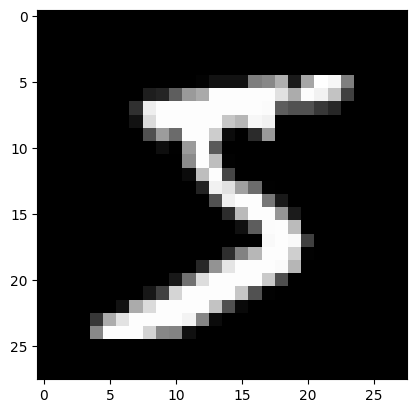

The above image is with the label of tensor(5)


In [7]:
from matplotlib import pyplot as plt

# Extract image and label from the training dataset
image = train_data.data[0]
label = train_data.targets[0]

# Visualise the image and print the label
# Note that the image has been rescaled to [0, 1] via ToTensor() in the Transform
plt.imshow(image, cmap='gray')
plt.show()
print("The above image is with the label of " + str(label))

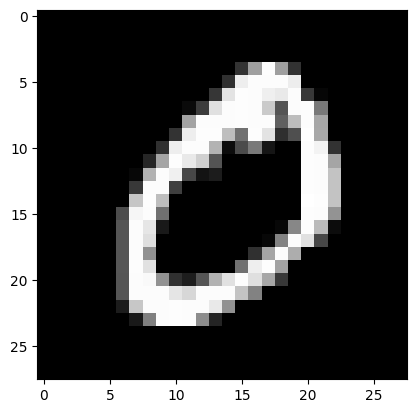

The above image is with the label of tensor(0)


In [8]:
# Your code here, try to plot another image, maybe train_data[1] or other image you like
image1 = train_data.data[1]
label = train_data.targets[1]

plt.imshow(image1, cmap="grey")
plt.show()
print("The above image is with the label of " + str(label))

In [9]:
# Try to print the raw value from data, to see what is it like
print(label)
print(nn.functional.one_hot(label, num_classes=10))

tensor(0)
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Labels

The label for each image is in form of an __integer__ ranging from 0 to 9. <br>
We can use a __one hot encoding__ to transform the label into a __binary vector__. We know there are 10
classes for this problem, so we can expect the binary vector to have 10 elements.

### Converting labels to one-hot representation
label <b>before</b> conversion is <b>[5]</b> <br>
label <b>after</b> conversion is <b>[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]</b>

In [10]:
#print the raw value of label
print(label)

#convert it to a one-hot vector
label_one_hot = nn.functional.one_hot(label, num_classes=10)
print(label_one_hot)

tensor(0)
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In PyTorch, the crossentropy function can deal with both labels.
https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
<br>
However, please note that you still need to output a vector with C elements for your network when dealing with a multi-class classfication problem. C is the number of classes.

In [11]:
# define the cross entropy loss function
crossentropy = nn.CrossEntropyLoss()

# given a prediction result of a network
prediction = torch.Tensor([0, 0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0]) # ste the predictions (we
                                                                # set highest to one we want -> 5 = 80%)

# When the label is the actual class index (5)
loss = crossentropy(prediction, label)
print("Actual class loss:", loss)

# When the label is the one-hot vector
loss = crossentropy(prediction, label_one_hot.type(torch.FloatTensor))
print("One hot vector encoding loss:", loss)

Actual class loss: tensor(2.4368)
One hot vector encoding loss: tensor(2.4368)


# Building the model
In this section we will combine previously demonstrated operations into one network. <br>

For this very simple model, we will be using [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) [Flatten](https://pytorch.org/docs/stable/generated/torch.flatten.html), [MaxPool2D](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) and  [Fully connected (linear)](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) layers.



In [12]:
class create_model(nn.Module):
    def __init__(self):
        super(create_model, self).__init__()
        # Define the first convolutional layer with 1 input channel, 32 output channels, kernel size 3, and padding 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        # ReLU activation
        self.relu = nn.ReLU()
        # Define the second convolutional layer with 32 input channels, 64 output channels, kernel size 3, and padding 1
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        # Define the max pooling layer with kernel size 2 and stride 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Flatten layer
        self.flatten = nn.Flatten()
        # Define the first fully connected layer with 64*7*7 input features and 128 output features
        self.fc1 = nn.Linear(64*7*7, 128)
        # Define the second fully connected layer with 128 input features and 10 output features(number of classes)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Pass through first convolutional layer and activation function
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        # Pass through second convolutional layer and activation function
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        # Flatten the output
        x = self.flatten(x)
        # Add two FC layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [13]:
# Model/data parameters
epochs = 3
batch_size = 64
num_classes = 10
learning_rate = 0.01

# Split the training dataset into train and validation sets
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_set, valid_set = torch.utils.data.random_split(train_data, [train_size, val_size])

# Data_loader are created to provides an efficient and flexible way to load data into a model
# for training or inference.
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

#Send model to the GPU device
model = create_model().to(device)

# Define the loss function and optimizer
crossentropy = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


# Calculate the accuracy given a set of predicted outputs (logits) and the label
def accuracy(output, target):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(target.view_as(pred)).sum().item()
    return correct / len(target)


# For loop over epoches
for epoch in range(epochs):
    # Switch to train mode
    model.train()

    # running loss and accuracy
    running_loss = 0.0
    running_accuracy = 0.0

    # For loop over mini batches
    for inputs, targets in tqdm(train_loader, desc = "Epoch-" + str(epoch) + " on " + str(device)):
        # Send data to GPU
        inputs, targets = inputs.to(device), targets.to(device)

        # In pytorch, always set the gradients to zero for each mini batch
        optimizer.zero_grad()

        # Forward
        output = model(inputs)

        # Loss
        loss = crossentropy(output, targets)

        # Backward
        loss.backward()

        # Model parameters update
        optimizer.step()

        # Upate running loss and accuracy
        running_loss += loss.item()
        running_accuracy += accuracy(output, targets)

    print('Train - Loss: {:.6f}, Accuracy: {:.2f}%'.format(
            running_loss / len(train_loader), running_accuracy / len(train_loader) * 100))
    # Validation loop
    model.eval()
    valid_loss = 0
    valid_accuracy = 0
    with torch.no_grad():
        for data, label in valid_loader:
            # Send data to GPU
            data, label = data.to(device), label.to(device)
            output = model(data)
            valid_loss += crossentropy(output, label).item()
            valid_accuracy += accuracy(output, label)

    print('Validation - Loss: {:.6f}, Accuracy: {:.2f}%\n'.format(
        valid_loss / len(valid_loader), valid_accuracy / len(valid_loader) * 100))



Epoch-0 on cuda: 100%|██████████| 750/750 [00:09<00:00, 80.07it/s]


Train - Loss: 1.414646, Accuracy: 61.97%
Validation - Loss: 0.431635, Accuracy: 86.67%



Epoch-1 on cuda: 100%|██████████| 750/750 [00:08<00:00, 84.00it/s]


Train - Loss: 0.340734, Accuracy: 89.50%
Validation - Loss: 0.281808, Accuracy: 91.26%



Epoch-2 on cuda: 100%|██████████| 750/750 [00:09<00:00, 78.60it/s]


Train - Loss: 0.245934, Accuracy: 92.38%
Validation - Loss: 0.214175, Accuracy: 93.38%



The neural network is trained. You can use it to make predictions.

In [14]:
# Switch model to evaluation mode
model.eval()

# Perform inference on the test set
test_acc = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        output = model(inputs)
        test_acc += accuracy(output, targets)

print("Total accuracy on the test set:", test_acc/ len(test_loader) * 100 )

Total accuracy on the test set: 93.82961783439491


## <font color='red'>Task 2</font>

Now, try to create a new model by yourself and train the model. <br>
Try to get a higher testing accuracy, e.g., 95%.

In [16]:
# ToTensor converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255 ] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [39]:
#Create your model
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        self.conv_layer1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        # ReLU activation performed
        self.relu = nn.ReLU()
        
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()

        # add another relu for increased non linearity
        self.relu3 = nn.ReLU()
        # self.conv_layer3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        
        # Pooling layer defined with kernel size 2 and stride of 2 to reduce size and get important parts
        self.pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)
        # Flatten the layer
        self.flatten = nn.Flatten()
        # define the first fully connected layer with 64*7*7 and 128 output features
        self.fc1 = nn.Linear(64*7*7, 128) # reduce size from 28*28 spatial resolution to 7*7
        # Define the second fully connected layer with 128 input features and 10 output features(number of classes)
        self.fc2 = nn.Linear(128, 10)


    def forward(self, x):
        # first pass
        x = self.conv_layer1(x)
        x = self.relu(x)
        x = self.pool_layer(x)
        # second pass
        x = self.conv_layer2(x)
        x = self.relu2(x)
        # third pass
        # x = self.conv_layer3(x)
        x = self.pool_layer(x)
        # Flatten the output
        x = self.flatten(x)
        # Add the 2 FC layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


#Train the model on MNIST


#Test the accuracy of the trained model on the test set





In [44]:
epochs = 6
batch_size = 100
num_classes = 10
learning_rate = 0.02

# split the data into training and validation
train_size = int(0.8 * len(train_data)) # 80% for training
validation_size = len(train_data) - train_size # 20% for validation
training_set, validation_set = torch.utils.data.random_split(train_data, [train_size, validation_size])

# create DataLoader pipelines
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validation_set, batch_size=batch_size, shuffle=False)
valid_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Send the model to the GPU device to run on there
model = Network().to(device=device)

# Define the loss function and optimizer
crossentropyloss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

def accuracy(output, target):
    prediction = output.argmax(dim=1, keepdim=True)
    correct = prediction.eq(target.view_as(prediction)).sum().item()
    return correct / len(target)


for epoch in range(epochs):
    # switch to train model
    model.train()

    # running loss and accuracy
    running_loss = 0.0
    running_accuracy = 0.0

        # For loop over mini batches
    for inputs, targets in tqdm(train_loader, desc = "Epoch-" + str(epoch) + " on " + str(device)):
        # send the data to GPU
        inputs, targets = inputs.to(device), targets.to(device)

        # set gradients to 0 for each mini batch
        optimizer.zero_grad()

        # Forward
        output = model(inputs)

        # Loss
        loss = crossentropy(output, targets)

        # Backward
        loss.backward()

        # Model parameters
        optimizer.step() # perform single optimization step

        running_loss += loss.item()
        running_accuracy += accuracy(output, targets)


    print('Train - Loss: {:.6f}, Accuracy: {:.2f}%'.format(
    running_loss / len(train_loader), running_accuracy / len(train_loader) * 100))


        # Validation loop
    model.eval()
    valid_loss = 0
    valid_accuracy = 0
    with torch.no_grad():
        for data, label in valid_loader:
            # Send data to GPU
            data, label = data.to(device), label.to(device)
            output = model(data)
            valid_loss += crossentropy(output, label).item()
            valid_accuracy += accuracy(output, label)

    print('Validation - Loss: {:.6f}, Accuracy: {:.2f}%\n'.format(
        valid_loss / len(valid_loader), valid_accuracy / len(valid_loader) * 100))





Epoch-0 on cuda:   0%|          | 0/480 [00:00<?, ?it/s]

Epoch-0 on cuda: 100%|██████████| 480/480 [00:08<00:00, 54.21it/s]


Train - Loss: 0.986200, Accuracy: 73.68%
Validation - Loss: 0.324197, Accuracy: 90.37%



Epoch-1 on cuda: 100%|██████████| 480/480 [00:08<00:00, 57.30it/s]


Train - Loss: 0.277772, Accuracy: 91.59%
Validation - Loss: 0.201698, Accuracy: 94.01%



Epoch-2 on cuda: 100%|██████████| 480/480 [00:10<00:00, 47.87it/s]


Train - Loss: 0.186230, Accuracy: 94.40%
Validation - Loss: 0.146091, Accuracy: 95.78%



Epoch-3 on cuda: 100%|██████████| 480/480 [00:09<00:00, 51.90it/s]


Train - Loss: 0.139159, Accuracy: 95.87%
Validation - Loss: 0.117388, Accuracy: 96.46%



Epoch-4 on cuda: 100%|██████████| 480/480 [00:08<00:00, 56.68it/s]


Train - Loss: 0.110786, Accuracy: 96.74%
Validation - Loss: 0.096874, Accuracy: 96.96%



Epoch-5 on cuda: 100%|██████████| 480/480 [00:08<00:00, 57.40it/s]


Train - Loss: 0.093991, Accuracy: 97.17%
Validation - Loss: 0.078214, Accuracy: 97.50%




### End of the notebook


In [38]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1650'